In [1]:
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score, mean_absolute_error #metrics of accuracy
from statsmodels.stats.outliers_influence import variance_inflation_factor # to find multicollinearity in between the variables
from sklearn.model_selection import train_test_split # Splitting the data into train and test
from sklearn.linear_model import LinearRegression # For fitting the model
from sklearn.preprocessing import StandardScaler # Standardize features by removing the mean and scaling to unit variance
import statsmodels.formula.api as sfa # for least square model
import statsmodels.api as sa # for least square model
import matplotlib.pyplot as plt # For visualization
from sklearn import metrics
import seaborn as sns # For visualization
import pandas as pd # for DataFrame importing and executing
import numpy as np # For single column or array purpose
%matplotlib inline
import lmdiag

## Problem Statement:

- **The data set explains about AfD (Alternative for Germany) is a political party in Germany**
    - AfD having changes in  2014 and 2019elections due to some effected reasons
    - We are finding that what are the due efectors change in voters as 2014 to 2019


In [81]:
# Importing the data set using pandas
df_data = pd.read_csv('dataset.csv',';')
pd.set_option('display.max_columns',None)
df_data.sample(5)

,Nr,region,subregion,state,vot19_14,turnout14,turnout19,turnout19_14,state_abbrev,debt_2013,debt_2014,debt_2015,debt_2016,debt_2017,debt_2018,ove18_13,area_2017,population_2017,germans_2017,foreigners_2017,population_density_2017,birth_balance_2017,net_migration_2017,age_to_18_2017,age_18_24_2017,age_25_34_2017,age_35_59_2017,ag4_60_74_2017,age_75_more_2017,disposable_inc_2016,gdp_2016,protection_total_2017,protection_open_2017,protection_accepted_2017,protection_rejected_2017,dwellings_new_2017,dwellings_2017,space_per_app_2017,space_per_inh_2017,vehicles_2018,graduates_voc_2017,Absolventen/Abgänger allgemeinbildender Schulen 2017 - insgesamt ohne Externe (je 1000 Einwohner),graduates_without_secondary_2017,graduates_lower_secondary_2017,graduates_secondary_2017,graduates_higher_2017,child_day_care_2018,business_reg_2017,insolvencies_2017,empl_total_2018,empl_agr_2018,empl_manuf_2018,empl_com_hotel_2018,empl_service_2018,empl_oth_service_2018,hartz_total_2018,hartz_no_empl_2018,hartz_foreign_2018,unempl_total_2019,unempl_male_2019,unempl_female_2019,unempl_15_19_2019,unempl_55_64_2019,foreigners_2017_2012,population_density_2017_2012,birth_balance_2017_2012,net_migration_2017_2012,age_to_18_2017_2012,age_18_24_2017_2012,age_25_34_2017_2012,age_35_59_2017_2012,ag4_60_74_2017_2012,age_75_more_2017_2012,graduates_without_secondary_2017_2012,graduates_lower_secondary_2017_2012,graduates_secondary_2017_2012,dwellings_new_2017_2012,dwellings_2017_2012,vehicles_2018_2013,business_reg_2017_2012,insolvencies_2017_2012,empl_total_2018_2012,empl_agr_2018_2012,empl_manuf_2018_2012,empl_com_hotel_2018_2012,empl_service_2018_2012,empl_oth_service_2018_2012,hartz_total_2018_2013,hartz_no_empl_2018_2013,unempl_total_2019_2013,unempl_male_2019_2013,unempl_female_2019_2013,area_2012,population_2012,male_2012,foreigners_2012,population_density_2012,birth_balance_2012,net_migration_2012,age_to_18_2012,age_18_24_2012,age_25_34_2012,age_35_59_2012,ag4_60_74_2012,age_75_more_2012,graduates_sec_2012,graduates_without_secondary_2012,graduates_lower_secondary_2012,graduates_secondary_2012,graduates_uni_2012,vehicles_2013,dwellings_new_2012,dwellings_2012,mining_manuf_2012,trade_tax_per_inh_2012,business_reg_2012,business_delist_2012,insolvencies_2012,insolvencies_per_1000_2012,empl_soc_sec_total_2012,empl_agr_2012,empl_manuf_2012,empl_com_hotel_2012,empl_service_2012,empl_oth_service_2012,unempl_total_2013,unempl_male_2013,unempl_female_2013,hartz_total_2013,hartz_no_empl_2013,total_suspects_2018,foreign_suspects_2018,f_crime_2018,total_suspects_2017,foreign_suspects_2017,f_crime_2017,total_suspects_2016,foreign_suspects_2016,f_crime_2016,total_suspects_2015,foreign_suspects_2015,f_crime_2015,total_suspects_2014,foreign_suspects_2014,f_crime_2014,total_suspects_2013,foreign_suspects_2013,f_crime_2013,total_suspects_2012,foreign_suspects_2012,f_crime_2012
71,5122,"Solingen, Klingenstadt",5.0,Nordrhein-Westfalen,3.253057,0.469308,0.573856,0.104548,KS,13.53,14.18,14.27,14.48,14.57,14.85,1.32,89.5,158.8,133.0,16.2,1773.5,-3.9,2.9,16.8,7.7,11.8,35.9,15.8,11.9,23357,31277,20.2,14.6,75.5,9.8,1.9,519.0,84.5,43.9,658.0,3.2,10.7,5.6,14.5,37.3,42.6,27.5,44.7,8.0,335.1,0.1,35.3,20.9,15.3,28.4,95.7,28.9,41.1,7.5,7.7,7.3,6.9,6.5,1.250000,-14.616533,8.333333,-35.555556,5.000000,-10.465116,-4.065041,0.560224,-7.058824,14.423077,-12.500000,-21.195652,11.676647,72.727273,-6.570657,26.368350,370.526316,175.862069,2.728387,0.000000,12.063492,-3.240741,-47.058824,58.659218,-29.476787,0.696864,-33.628319,-29.357798,-67.264574,89.6,159.9,77.7,13.2,1785.8,-3.8,5.2,16.6,8.0,11.0,37.1,16.5,10.7,11.4,4.4,18.3,35.1,42.1,598.9,1.5,520.0,0.8,615.3,8.6,9.4,1.9,1.8,294.6,0.1,38.8,21.3,25.9,14.0,9.5,9.2,18.8,92.4,28.0,202,60,29.7,269,111,41.3,232.0,100.0,43.1,245.0,100.0,40.8,245.0,109.0,44.5,259.0,97.0,37.5,276.0,102.0,37.0
267,9461,"Bamberg, Stadt",9.0,Bayern,0.787526,0.402236,0.603515,0.201279,KS,8.66,8.54,8.31,8.61,8.51,8.12,-0.54,54.6,77.2,66.2,14.2,1413.0,-0.5,19.2,14.5,10.2,18

## Observations: 

- The dataset having 401 rows and 151 columns.
- In total columns, 5 columns are categorical columns and ramaining columns are numerical columns.
- In the given data set `vot19_14` is the dependent variable and the remaining are independent variables. 
- Dependent variable is a `Numerical continuous variable`. 
- All the independent variables are `numerical variables`.
- There are some null-values are presented in the data set

In [82]:
df_data.describe(include = 'all')

,Nr,region,subregion,state,vot19_14,turnout14,turnout19,turnout19_14,state_abbrev,debt_2013,debt_2014,debt_2015,debt_2016,debt_2017,debt_2018,ove18_13,area_2017,population_2017,germans_2017,foreigners_2017,population_density_2017,birth_balance_2017,net_migration_2017,age_to_18_2017,age_18_24_2017,age_25_34_2017,age_35_59_2017,ag4_60_74_2017,age_75_more_2017,disposable_inc_2016,gdp_2016,protection_total_2017,protection_open_2017,protection_accepted_2017,protection_rejected_2017,dwellings_new_2017,dwellings_2017,space_per_app_2017,space_per_inh_2017,vehicles_2018,graduates_voc_2017,Absolventen/Abgänger allgemeinbildender Schulen 2017 - insgesamt ohne Externe (je 1000 Einwohner),graduates_without_secondary_2017,graduates_lower_secondary_2017,graduates_secondary_2017,graduates_higher_2017,child_day_care_2018,business_reg_2017,insolvencies_2017,empl_total_2018,empl_agr_2018,empl_manuf_2018,empl_com_hotel_2018,empl_service_2018,empl_oth_service_2018,hartz_total_2018,hartz_no_empl_2018,hartz_foreign_2018,unempl_total_2019,unempl_male_2019,unempl_female_2019,unempl_15_19_2019,unempl_55_64_2019,foreigners_2017_2012,population_density_2017_2012,birth_balance_2017_2012,net_migration_2017_2012,age_to_18_2017_2012,age_18_24_2017_2012,age_25_34_2017_2012,age_35_59_2017_2012,ag4_60_74_2017_2012,age_75_more_2017_2012,graduates_without_secondary_2017_2012,graduates_lower_secondary_2017_2012,graduates_secondary_2017_2012,dwellings_new_2017_2012,dwellings_2017_2012,vehicles_2018_2013,business_reg_2017_2012,insolvencies_2017_2012,empl_total_2018_2012,empl_agr_2018_2012,empl_manuf_2018_2012,empl_com_hotel_2018_2012,empl_service_2018_2012,empl_oth_service_2018_2012,hartz_total_2018_2013,hartz_no_empl_2018_2013,unempl_total_2019_2013,unempl_male_2019_2013,unempl_female_2019_2013,area_2012,population_2012,male_2012,foreigners_2012,population_density_2012,birth_balance_2012,net_migration_2012,age_to_18_2012,age_18_24_2012,age_25_34_2012,age_35_59_2012,ag4_60_74_2012,age_75_more_2012,graduates_sec_2012,graduates_without_secondary_2012,graduates_lower_secondary_2012,graduates_secondary_2012,graduates_uni_2012,vehicles_2013,dwellings_new_2012,dwellings_2012,mining_manuf_2012,trade_tax_per_inh_2012,business_reg_2012,business_delist_2012,insolvencies_2012,insolvencies_per_1000_2012,empl_soc_sec_total_2012,empl_agr_2012,empl_manuf_2012,empl_com_hotel_2012,empl_service_2012,empl_oth_service_2012,unempl_total_2013,unempl_male_2013,unempl_female_2013,hartz_total_2013,hartz_no_empl_2013,total_suspects_2018,foreign_suspects_2018,f_crime_2018,total_suspects_2017,foreign_suspects_2017,f_crime_2017,total_suspects_2016,foreign_suspects_2016,f_crime_2016,total_suspects_2015,foreign_suspects_2015,f_crime_2015,total_suspects_2014,foreign_suspects_2014,f_crime_2014,total_suspects_2013,foreign_suspects_2013,f_crime_2013,total_suspects_2012,foreign_suspects_2012,f_crime_2012
count,401.000000,401,401.000000,401,401.000000,401.000000,401.000000,401.000000,401,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,394.000000,400.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,395.000000,395.000000,395.000000,395.000000,401.000000,401.000000,401.000000,401.000000,401.000000,397.000000,401.000000,401.000000,401.000000,401.000000,399.000000,401.000000,401.000000,401.000000,401.000000,385.000000,393.000000,399.000000,395.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,392.000000,398.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,375.000000,393.000000,399.000000,395.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,400.000000,401.000000,401.000000,401.000000,401.000000,

## Feature Engeneering

In [83]:
# Checking the null values
df_data.columns[df_data.isnull().any()]

Index(['birth_balance_2017', 'net_migration_2017', 'protection_total_2017',
       'protection_open_2017', 'protection_accepted_2017',
       'protection_rejected_2017', 'graduates_voc_2017',
       'graduates_higher_2017', 'empl_agr_2018', 'empl_manuf_2018',
       'empl_com_hotel_2018', 'empl_service_2018', 'birth_balance_2017_2012',
       'net_migration_2017_2012', 'empl_agr_2018_2012', 'empl_manuf_2018_2012',
       'empl_com_hotel_2018_2012', 'empl_service_2018_2012',
       'net_migration_2012', 'graduates_uni_2012',
       'insolvencies_per_1000_2012', 'unempl_total_2013', 'unempl_male_2013',
       'unempl_female_2013'],
      dtype='object')

In [84]:
round(100*(df_data.isnull().sum()/len(df_data.index)),1)

Nr                         0.0
region                     0.0
subregion                  0.0
state                      0.0
vot19_14                   0.0
turnout14                  0.0
turnout19                  0.0
turnout19_14               0.0
state_abbrev               0.0
debt_2013                  0.0
debt_2014                  0.0
debt_2015                  0.0
debt_2016                  0.0
debt_2017                  0.0
debt_2018                  0.0
ove18_13                   0.0
area_2017                  0.0
population_2017            0.0
germans_2017               0.0
foreigners_2017            0.0
population_density_2017    0.0
birth_balance_2017         1.7
net_migration_2017         0.2
age_to_18_2017             0.0
age_18_24_2017             0.0
age_25_34_2017             0.0
age_35_59_2017             0.0
ag4_60_74_2017             0.0
age_75_more_2017           0.0
disposable_inc_2016        0.0
                          ... 
empl_manuf_2012            0.0
empl_com

In [85]:
df1 = df_data.drop(columns = ['Nr','state_abbrev','state','region','birth_balance_2017', 'net_migration_2017', 
                              'protection_total_2017','protection_open_2017', 'protection_accepted_2017',
       'protection_rejected_2017', 'graduates_voc_2017',
       'graduates_higher_2017', 'empl_agr_2018', 'empl_manuf_2018',
       'empl_com_hotel_2018', 'empl_service_2018', 'birth_balance_2017_2012',
       'net_migration_2017_2012', 'empl_agr_2018_2012', 'empl_manuf_2018_2012',
       'empl_com_hotel_2018_2012', 'empl_service_2018_2012',
       'net_migration_2012', 'graduates_uni_2012',
       'insolvencies_per_1000_2012', 'unempl_total_2013', 'unempl_male_2013',
       'unempl_female_2013'],axis = 1)

In [86]:
# after imputing rechecking the null values 
df1.columns[df1.isnull().any()]

Index([], dtype='object')

In [87]:
list(df1.columns)

['subregion',
 'vot19_14',
 'turnout14',
 'turnout19',
 'turnout19_14',
 'debt_2013',
 'debt_2014',
 'debt_2015',
 'debt_2016',
 'debt_2017',
 'debt_2018',
 'ove18_13',
 'area_2017',
 'population_2017',
 'germans_2017',
 'foreigners_2017',
 'population_density_2017',
 'age_to_18_2017',
 'age_18_24_2017',
 'age_25_34_2017',
 'age_35_59_2017',
 'ag4_60_74_2017',
 'age_75_more_2017',
 'disposable_inc_2016',
 'gdp_2016',
 'dwellings_new_2017',
 'dwellings_2017',
 'space_per_app_2017',
 'space_per_inh_2017',
 'vehicles_2018',
 'Absolventen/Abgänger allgemeinbildender Schulen 2017 - insgesamt ohne Externe (je 1000 Einwohner)',
 'graduates_without_secondary_2017',
 'graduates_lower_secondary_2017',
 'graduates_secondary_2017',
 'child_day_care_2018',
 'business_reg_2017',
 'insolvencies_2017',
 'empl_total_2018',
 'empl_oth_service_2018',
 'hartz_total_2018',
 'hartz_no_empl_2018',
 'hartz_foreign_2018',
 'unempl_total_2019',
 'unempl_male_2019',
 'unempl_female_2019',
 'unempl_15_19_2019',
 

count    401.000000
mean       4.399567
std        5.304025
min       -2.899875
25%        1.091844
50%        2.770999
75%        4.692135
max       21.333849
Name: vot19_14, dtype: float64


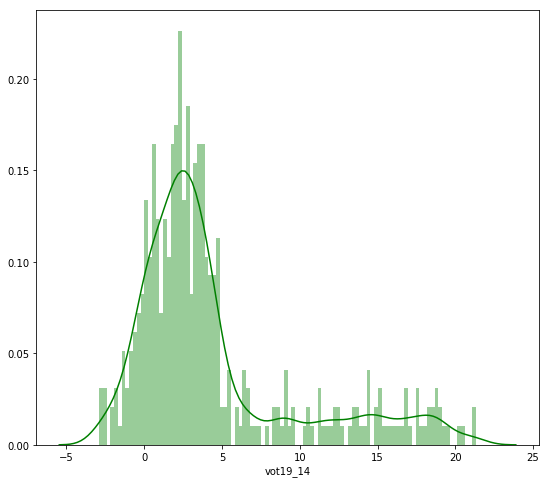

In [10]:
# Distribution of dependent variable('vot19_14')
print(df1['vot19_14'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df1['vot19_14'], color='g', bins=100, hist_kws={'alpha': 0.4});

### Observations for Dependent variable:

- Dependent variable having positive skewness.
- 0 to 5 values are are having high.

In [90]:
df1.drop(columns = 'vot19_14', inplace = True)


In [91]:
df = df_data['vot19_14']


In [92]:
df_con = pd.concat([df1,df],axis = 1)

In [93]:
# All Numerical columns
df_num = df_con.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,subregion,turnout14,turnout19,turnout19_14,debt_2013,debt_2014,debt_2015,debt_2016,debt_2017,debt_2018,ove18_13,area_2017,population_2017,germans_2017,foreigners_2017,population_density_2017,age_to_18_2017,age_18_24_2017,age_25_34_2017,age_35_59_2017,ag4_60_74_2017,age_75_more_2017,disposable_inc_2016,gdp_2016,dwellings_new_2017,dwellings_2017,space_per_app_2017,space_per_inh_2017,vehicles_2018,Absolventen/Abgänger allgemeinbildender Schulen 2017 - insgesamt ohne Externe (je 1000 Einwohner),graduates_without_secondary_2017,graduates_lower_secondary_2017,graduates_secondary_2017,child_day_care_2018,business_reg_2017,insolvencies_2017,empl_total_2018,empl_oth_service_2018,hartz_total_2018,hartz_no_empl_2018,hartz_foreign_2018,unempl_total_2019,unempl_male_2019,unempl_female_2019,unempl_15_19_2019,unempl_55_64_2019,foreigners_2017_2012,population_density_2017_2012,age_to_18_2017_2012,age_18_24_2017_2012,age_25_34_2017_2012,age_35_59_2017_2012,ag4_60_74_2017_2012,age_75_more_2017_2012,graduates_without_secondary_2017_2012,graduates_lower_secondary_2017_2012,graduates_secondary_2017_2012,dwellings_new_2017_2012,dwellings_2017_2012,vehicles_2018_2013,business_reg_2017_2012,insolvencies_2017_2012,empl_total_2018_2012,empl_oth_service_2018_2012,hartz_total_2018_2013,hartz_no_empl_2018_2013,unempl_total_2019_2013,unempl_male_2019_2013,unempl_female_2019_2013,area_2012,population_2012,male_2012,foreigners_2012,population_density_2012,birth_balance_2012,age_to_18_2012,age_18_24_2012,age_25_34_2012,age_35_59_2012,ag4_60_74_2012,age_75_more_2012,graduates_sec_2012,graduates_without_secondary_2012,graduates_lower_secondary_2012,graduates_secondary_2012,vehicles_2013,dwellings_new_2012,dwellings_2012,mining_manuf_2012,trade_tax_per_inh_2012,business_reg_2012,business_delist_2012,insolvencies_2012,empl_soc_sec_total_2012,empl_agr_2012,empl_manuf_2012,empl_com_hotel_2012,empl_service_2012,empl_oth_service_2012,hartz_total_2013,hartz_no_empl_2013,total_suspects_2018,foreign_suspects_2018,f_crime_2018,total_suspects_2017,foreign_suspects_2017,f_crime_2017,total_suspects_2016,foreign_suspects_2016,f_crime_2016,total_suspects_2015,foreign_suspects_2015,f_crime_2015,total_suspects_2014,foreign_suspects_2014,f_crime_2014,total_suspects_2013,foreign_suspects_2013,f_crime_2013,total_suspects_2012,foreign_suspects_2012,f_crime_2012,vot19_14
0,1.0,0.357400,0.562920,0.205520,16.41,16.40,16.21,16.17,16.21,16.24,-0.17,56.7,88.5,76.8,13.3,1560.4,15.4,11.9,15.4,31.6,15.2,10.6,18481,42827,2.6,559.3,78.8,44.1,556.4,13.9,8.5,11.6,32.5,36.4,38.6,4.3,497.6,38.7,137.9,25.6,29.7,8.2,9.0,7.2,5.1,7.7,68.354430,-1.607920,2.666667,0.847458,-1.910828,-1.863354,-4.402516,13.978495,39.344262,-36.263736,13.636364,8.333333,1.969006,9.398348,365.060241,30.303030,21.632853,87.864078,13.966942,-5.185185,-21.153846,-4.255319,-59.776536,56.7,90.0,44.3,7.9,1585.9,-1.4,15.0,11.8,15.7,32.2,15.9,9.3,13.8,6.1,18.2,28.6,508.6,2.4,548.5,0.4,449.2,8.3,9.2,3.3,409.1,0.0,17.1,27.7,34.6,20.6,121.0,27.0,235,87,37.0,280,97,34.6,246.0,70.0,28.5,243.0,79.0,32.5,233.0,66.0,28.3,207.0,45.0,21.7,277.0,42.0,15.2,-0.003027
1,1.0,0.402589,0.588603,0.186015,12.04,12.03,12.17,12.23,12.16,11.96,-0.08,118.7,247.9,220.0,11.3,2089.7,14.7,11.0,18.1,32.4,14.1,9.7,18810,45821,1.7,541.9,71.8,38.9,512.2,8.8,7.3,14.4,31.8,35.4,35.2,3.8,499.9,38.7,140.4,26.8,33.6,7.9,8.9,6.9,4.7,8.2,22.826087,1.505805,4.255319,-1.785714,7.738095,-6.086957,-6.622517,15.476190,4.285714,-32.075472,5.298013,41.666667,-1.633690,6.287612,252.000000,52.000000,12.463442,56.048387,6.849315,-1.470588,-23.300971,-1.111111,-72.289157,118.7,244.3,120.1,9.2,2058.7,-0.7,14.1,11.2,16.8,34.5,15.1,8.4,9.5,7.0,21.2,30.2,481.9,1.2,550.9,0.3,329.7,10.0,8.7,2.5,444.5,0.0,16.4,21.1,37.7,24.8,131.4,27.2,479,145,30.3,487,164,33.7,443.0,143.0,32.3,484.0,128.0,26.4,463.0,80.0,17.3,439.0,113.0,25.7,490.0,95.0,19.4,0.060316
2,1.0,0.376398,0.546124,0.169726,15.25,15.59,15.26,15.29,15.04,14.76,-0.49,214.2,216.3,195.4,9.7,1009.9,15.2,8.2,13.3,34.1,16.6,12.7,1

C:\Users\kiran kumar\Anaconda3\lib\site-packages\matplotlib\tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '
C:\Users\kiran kumar\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


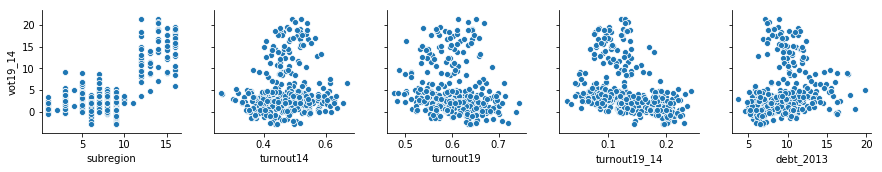

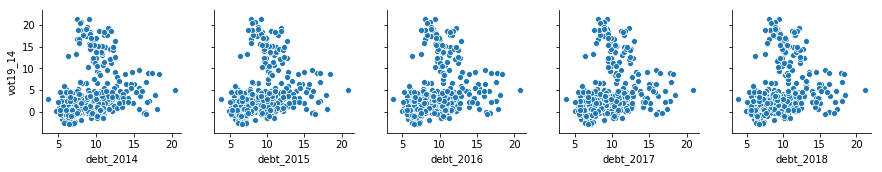

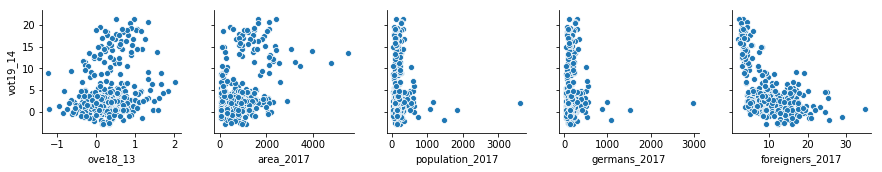

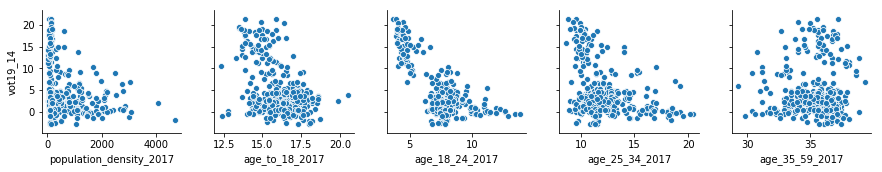

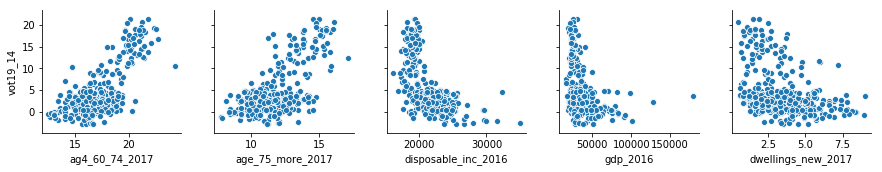

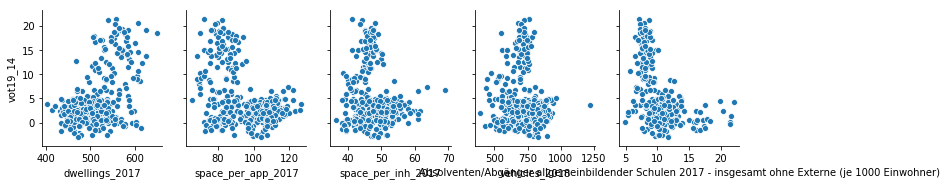

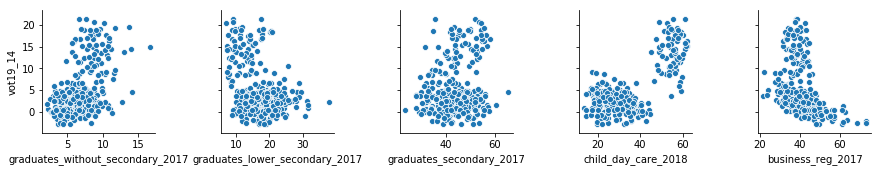

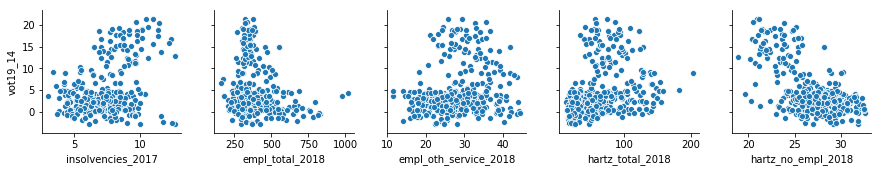

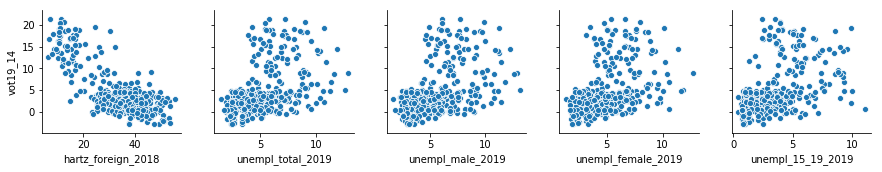

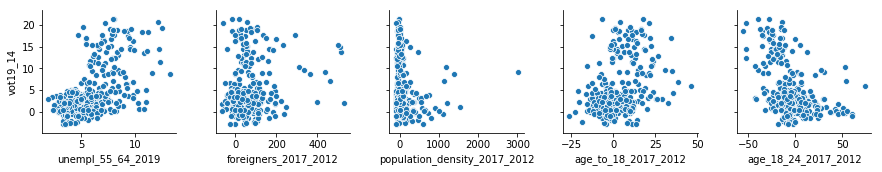

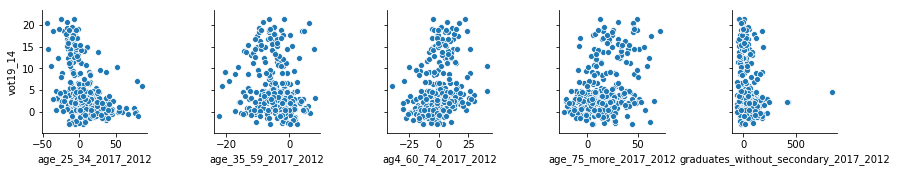

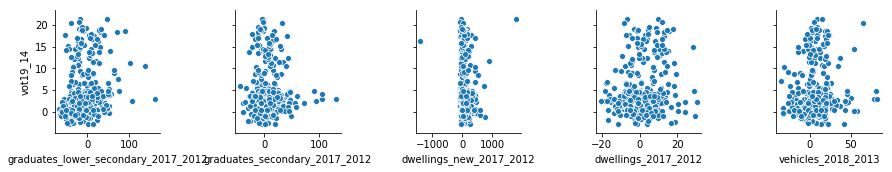

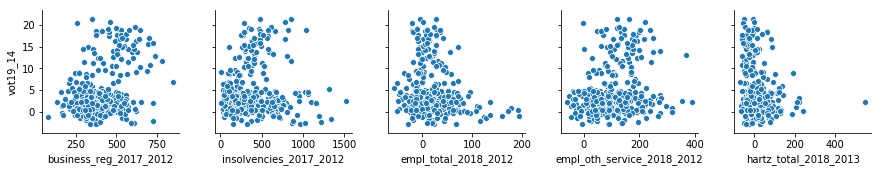

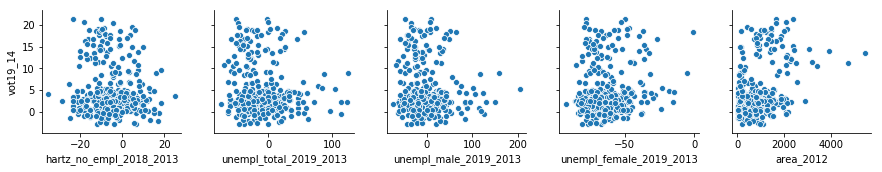

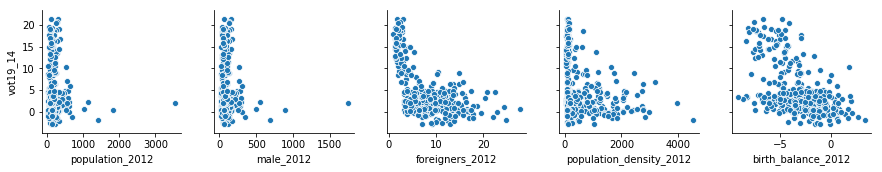

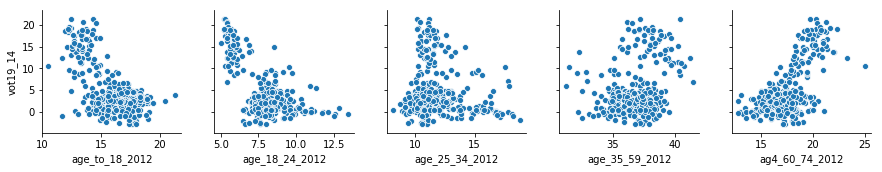

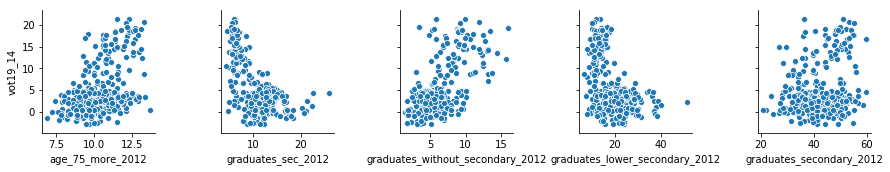

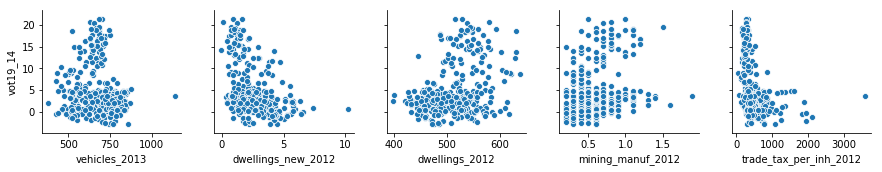

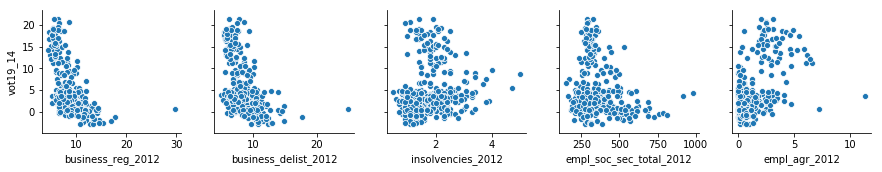

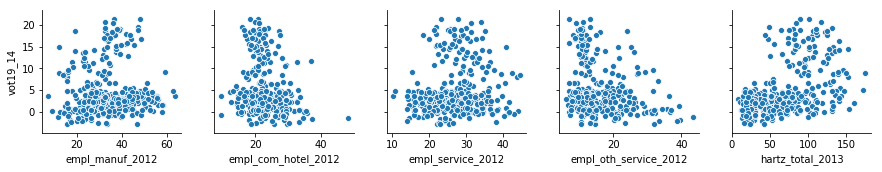

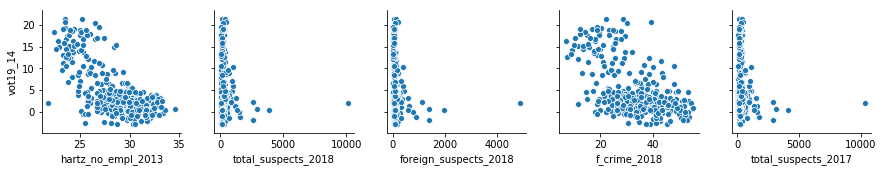

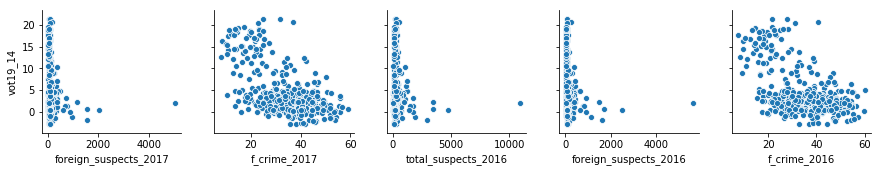

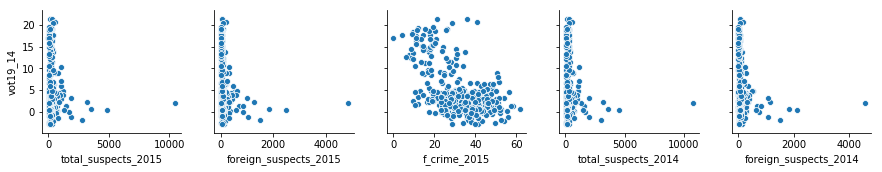

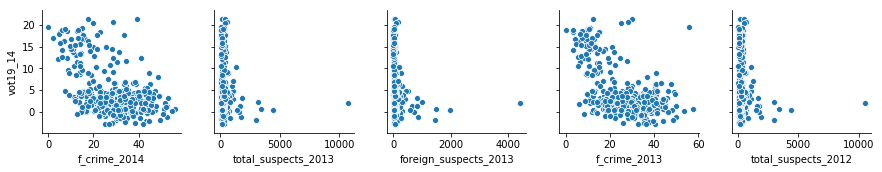

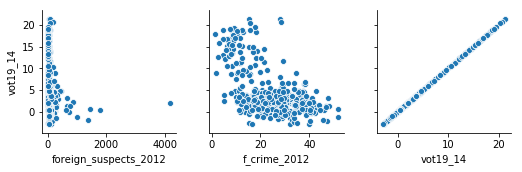

In [94]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num, palette="PiYG",
                x_vars=df_num.columns[i:i+5],
                y_vars=['vot19_14'])

In [ ]:
### Observations for All variables to the dependent variable:

- 

## Feature Selection:

### Method:1 - Correlation:

In [95]:
import operator

individual_features_df = []
for i in range(0, len(df_num.columns)-1): 
    tmpDf = df_num[[df_num.columns[i], 'vot19_14']]
    tmpDf = tmpDf[tmpDf[df_num.columns[i]] != 0]
    individual_features_df.append(tmpDf)


In [96]:
all_correlations = {feature.columns[0]: feature.corr()['vot19_14'][0] for feature in individual_features_df}
all_correlations = sorted(all_correlations.items(), key=operator.itemgetter(1))
for (key, value) in all_correlations:
    print("{:>30}:      {:>15}".format(key, value))


            hartz_foreign_2018:      -0.768042077524162
                age_18_24_2017:      -0.7338527910654464
            hartz_no_empl_2013:      -0.6568672859974899
                age_18_24_2012:      -0.6446348879273806
                age_to_18_2012:      -0.6111870991519275
            hartz_no_empl_2018:      -0.6087274946403054
           disposable_inc_2016:      -0.5867118880949811
            graduates_sec_2012:      -0.5705980773164876
                  f_crime_2017:      -0.5565801494519826
               foreigners_2017:      -0.5457196188572296
               foreigners_2012:      -0.5448238218051192
                  f_crime_2012:      -0.5396522876144207
             business_reg_2012:      -0.5386959478502223
                  f_crime_2016:      -0.5329912504893666
                  f_crime_2013:      -0.5277869350251639
                  f_crime_2018:      -0.5275402819972306
            birth_balance_2012:      -0.5180381736600282
                  f_crime_2015: 

In [97]:
golden_features_list = [key for key, value in all_correlations if abs(value) >= 0.5]
print("There is {} strongly correlated values with vot19_14:\n\n{}".format(len(golden_features_list), golden_features_list))

There is 28 strongly correlated values with vot19_14:

['hartz_foreign_2018', 'age_18_24_2017', 'hartz_no_empl_2013', 'age_18_24_2012', 'age_to_18_2012', 'hartz_no_empl_2018', 'disposable_inc_2016', 'graduates_sec_2012', 'f_crime_2017', 'foreigners_2017', 'foreigners_2012', 'f_crime_2012', 'business_reg_2012', 'f_crime_2016', 'f_crime_2013', 'f_crime_2018', 'birth_balance_2012', 'f_crime_2015', 'f_crime_2014', 'empl_agr_2012', 'dwellings_2017', 'unempl_55_64_2019', 'graduates_without_secondary_2012', 'ag4_60_74_2012', 'age_75_more_2017', 'subregion', 'ag4_60_74_2017', 'child_day_care_2018']


In [99]:
quantitative_features_list = ['hartz_foreign_2018', 'age_18_24_2017', 'hartz_no_empl_2013', 'age_18_24_2012', 
                              'age_to_18_2012', 'hartz_no_empl_2018', 'disposable_inc_2016', 'graduates_sec_2012', 
                              'f_crime_2017', 'foreigners_2017', 'foreigners_2012', 'f_crime_2012', 'business_reg_2012', 
                              'f_crime_2016', 'f_crime_2013', 'f_crime_2018', 'birth_balance_2012', 'f_crime_2015',
                              'f_crime_2014', 'empl_agr_2012', 'dwellings_2017', 'unempl_55_64_2019', 
                              'graduates_without_secondary_2012', 'ag4_60_74_2012', 'age_75_more_2017', 
                              'subregion', 'ag4_60_74_2017', 'child_day_care_2018']
df_quantitative_values = df_num[quantitative_features_list]
df_quantitative_values.head()

,hartz_foreign_2018,age_18_24_2017,hartz_no_empl_2013,age_18_24_2012,age_to_18_2012,hartz_no_empl_2018,disposable_inc_2016,graduates_sec_2012,f_crime_2017,foreigners_2017,foreigners_2012,f_crime_2012,business_reg_2012,f_crime_2016,f_crime_2013,f_crime_2018,birth_balance_2012,f_crime_2015,f_crime_2014,empl_agr_2012,dwellings_2017,unempl_55_64_2019,graduates_without_secondary_2012,ag4_60_74_2012,age_75_more_2017,subregion,ag4_60_74_2017,child_day_care_2018
0,29.7,11.9,27.0,11.8,15.0,25.6,18481,13.8,34.6,13.3,7.9,15.2,8.3,28.5,21.7,37.0,-1.4,32.5,28.3,0.0,559.3,7.7,6.1,15.9,10.6,1.0,15.2,36.4
1,33.6,11.0,27.2,11.2,14.1,26.8,18810,9.5,33.7,11.3,9.2,19.4,10.0,32.3,25.7,30.3,-0.7,26.4,17.3,0.0,541.9,8.2,7.0,15.1,9.7,1.0,14.1,35.4
2,27.0,8.2,27.1,8.8,15.3,26.6,19575,9.1,26.2,9.7,7.3,19.2,8.8,26.9,16.7,25.3,-4.0,23.4,21.3,0.1,541.9,7.6,9.6,17.7,12.7,1.0,16.6,35.7
3,25.7,8.2,29.7,9.0,17.2,26.5,18922,13.7,33.9,11.0,6.2,18.2,11.0,42.9,22.4,41.6,-4.0,31.6,24.5,1.0,525.4,7.5,5.2,17.7,12.2,1.0,16.5,31.5
4,23.0,7.8,28.8,7.7,17.2,27.4,21571,11.6,17.6,5.6,3.8,10.1,9.4,28.6,16.6,26.9,-5.3,12.2,11.4,3.3,523.3,6.3,10.0,19.2,12.7,1.0,18.8,21.7


In [100]:
features_to_analyse = [x for x in quantitative_features_list if x in golden_features_list]
features_to_analyse.append('vot19_14')
features_to_analyse

['hartz_foreign_2018',
 'age_18_24_2017',
 'hartz_no_empl_2013',
 'age_18_24_2012',
 'age_to_18_2012',
 'hartz_no_empl_2018',
 'disposable_inc_2016',
 'graduates_sec_2012',
 'f_crime_2017',
 'foreigners_2017',
 'foreigners_2012',
 'f_crime_2012',
 'business_reg_2012',
 'f_crime_2016',
 'f_crime_2013',
 'f_crime_2018',
 'birth_balance_2012',
 'f_crime_2015',
 'f_crime_2014',
 'empl_agr_2012',
 'dwellings_2017',
 'unempl_55_64_2019',
 'graduates_without_secondary_2012',
 'ag4_60_74_2012',
 'age_75_more_2017',
 'subregion',
 'ag4_60_74_2017',
 'child_day_care_2018',
 'vot19_14']

In [102]:
round(len(features_to_analyse) / 3)

10

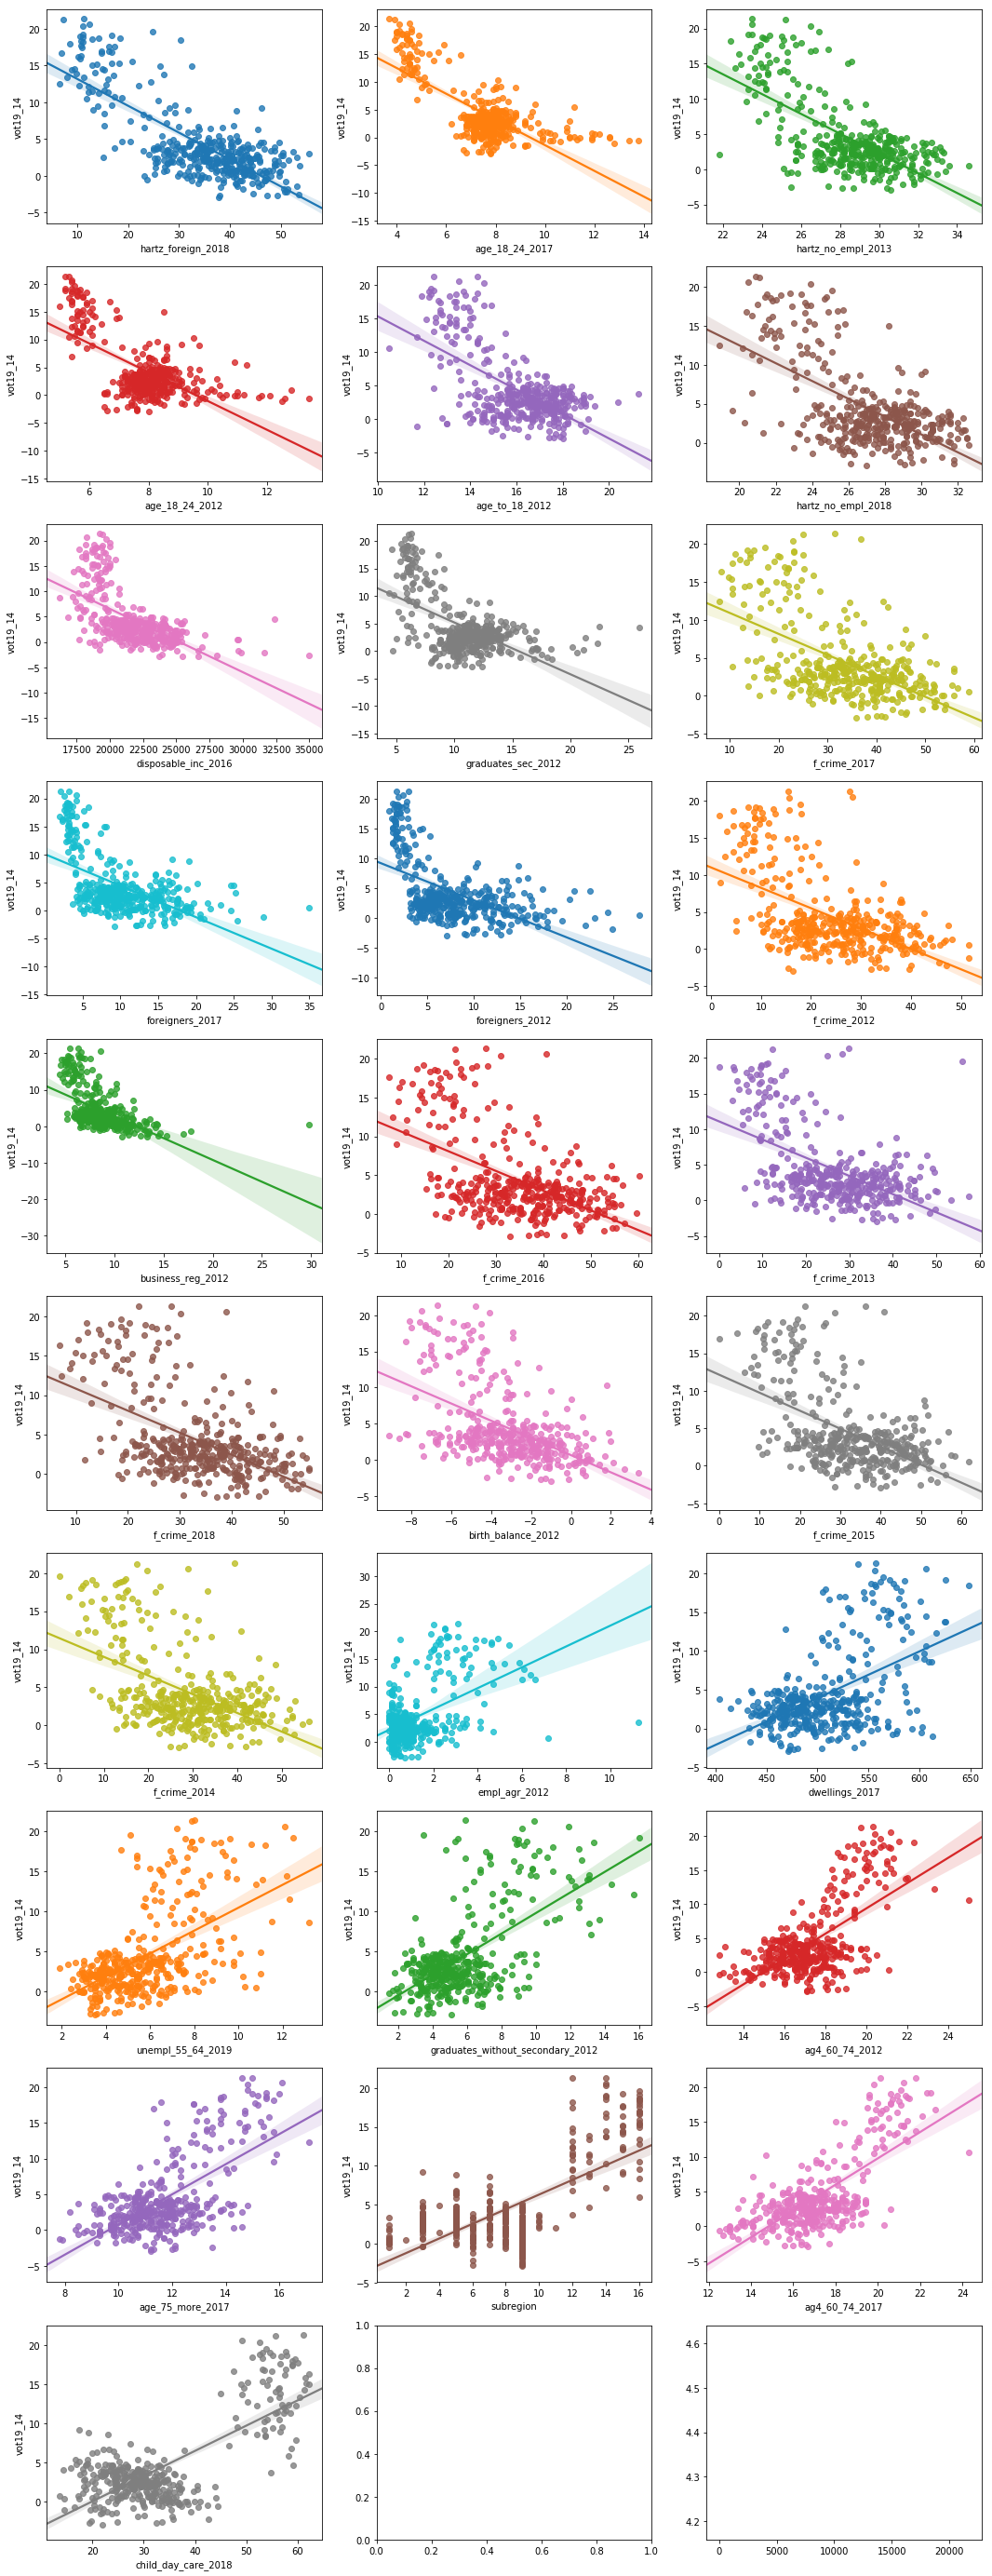

In [101]:
fig, ax = plt.subplots(round(len(features_to_analyse) / 3), 3, figsize = (18, 50))

for i, ax in enumerate(fig.axes):
    if i < len(features_to_analyse) - 1:
        sns.regplot(x=features_to_analyse[i],y='vot19_14', data=df_num[features_to_analyse], ax=ax)

### Method:2- Variance Inflation Factor:

### Rescaling of the DataFrame:

In [65]:
sc = StandardScaler()
df_Xd = pd.DataFrame(sc.fit_transform(df_num), columns = Xd.columns)
df_Xd.head()

C:\Users\kiran kumar\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\kiran kumar\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,subregion,turnout14,turnout19,turnout19_14,debt_2013,debt_2014,debt_2015,debt_2016,debt_2017,debt_2018,ove18_13,area_2017,population_2017,germans_2017,foreigners_2017,population_density_2017,birth_balance_2017,net_migration_2017,age_to_18_2017,age_18_24_2017,age_25_34_2017,age_35_59_2017,ag4_60_74_2017,age_75_more_2017,disposable_inc_2016,gdp_2016,protection_total_2017,protection_open_2017,protection_accepted_2017,protection_rejected_2017,dwellings_new_2017,dwellings_2017,space_per_app_2017,space_per_inh_2017,vehicles_2018,graduates_voc_2017,Absolventen/Abgänger allgemeinbildender Schulen 2017 - insgesamt ohne Externe (je 1000 Einwohner),graduates_without_secondary_2017,graduates_lower_secondary_2017,graduates_secondary_2017,graduates_higher_2017,child_day_care_2018,business_reg_2017,insolvencies_2017,empl_total_2018,empl_agr_2018,empl_manuf_2018,empl_com_hotel_2018,empl_service_2018,empl_oth_service_2018,hartz_total_2018,hartz_no_empl_2018,hartz_foreign_2018,unempl_total_2019,unempl_male_2019,unempl_female_2019,unempl_15_19_2019,unempl_55_64_2019,foreigners_2017_2012,population_density_2017_2012,birth_balance_2017_2012,net_migration_2017_2012,age_to_18_2017_2012,age_18_24_2017_2012,age_25_34_2017_2012,age_35_59_2017_2012,ag4_60_74_2017_2012,age_75_more_2017_2012,graduates_without_secondary_2017_2012,graduates_lower_secondary_2017_2012,graduates_secondary_2017_2012,dwellings_new_2017_2012,dwellings_2017_2012,vehicles_2018_2013,business_reg_2017_2012,insolvencies_2017_2012,empl_total_2018_2012,empl_agr_2018_2012,empl_manuf_2018_2012,empl_com_hotel_2018_2012,empl_service_2018_2012,empl_oth_service_2018_2012,hartz_total_2018_2013,hartz_no_empl_2018_2013,unempl_total_2019_2013,unempl_male_2019_2013,unempl_female_2019_2013,area_2012,population_2012,male_2012,foreigners_2012,population_density_2012,birth_balance_2012,net_migration_2012,age_to_18_2012,age_18_24_2012,age_25_34_2012,age_35_59_2012,ag4_60_74_2012,age_75_more_2012,graduates_sec_2012,graduates_without_secondary_2012,graduates_lower_secondary_2012,graduates_secondary_2012,graduates_uni_2012,vehicles_2013,dwellings_new_2012,dwellings_2012,mining_manuf_2012,trade_tax_per_inh_2012,business_reg_2012,business_delist_2012,insolvencies_2012,insolvencies_per_1000_2012,empl_soc_sec_total_2012,empl_agr_2012,empl_manuf_2012,empl_com_hotel_2012,empl_service_2012,empl_oth_service_2012,unempl_total_2013,unempl_male_2013,unempl_female_2013,hartz_total_2013,hartz_no_empl_2013,total_suspects_2018,foreign_suspects_2018,f_crime_2018,total_suspects_2017,foreign_suspects_2017,f_crime_2017,total_suspects_2016,foreign_suspects_2016,f_crime_2016,total_suspects_2015,foreign_suspects_2015,f_crime_2015,total_suspects_2014,foreign_suspects_2014,f_crime_2014,total_suspects_2013,foreign_suspects_2013,f_crime_2013,total_suspects_2012,foreign_suspects_2012,f_crime_2012,vot19_14
0,-1.837268,-1.605935,-0.892876,1.485324,2.610854,2.530004,2.455202,2.368011,2.399961,2.381861,-1.001207,-1.154299,-0.487754,-0.529919,0.634889,1.463035,0.392143,2.154151,-0.618027,2.618765,1.491327,-2.341754,-0.976006,-0.690673,-1.299295,0.449985,1.100429,-0.465741,0.574322,-0.514090,-0.427349,1.143728,-1.255760,-0.873489,-1.521735,3.464323,1.403764,0.867471,-0.987626,-1.729270,1.721402,0.247295,-0.305959,-1.615773,0.911811,-0.935783,-1.604975,0.635419,0.597146,1.624668,2.169962,-0.524535,-0.384805,1.413812,1.529084,1.186944,0.833582,0.946029,0.173396,-0.285370,0.119144,0.057814,0.100567,0.284124,-0.389015,0.505659,-0.346329,-0.086488,0.139683,-1.009021,0.312666,-0.383834,0.143781,0.123387,-0.289158,-1.362265,0.107245,-0.220435,-0.181168,-0.401445,-0.192317,-0.234471,0.087677,-0.070038,-0.311913,-0.016940,0.327609,-1.156099,-0.482891,-0.484498,0.026225,1.540213,0.768106,1.047032,-0.570283,2.964305,2.142800,-3.051862,-0.789345,-0.744454,0.917978,0.118593,-0.053099,-1.828102,1.336058,-1.699976,-0.027133,0.958920,-0.777983,-0.043493,-0.119227,0.437989,2.201269,0.019462,0.529968,-0.847515,-1.579955,1.073279,1.304523,0.742227,1.40961

In [25]:
df_Xd.shape

(401, 147)

In [26]:
vif = pd.DataFrame()
df_vif = df_Xd.drop(['vot19_14'], axis = 1)
vif['Features'] = df_vif.keys()


In [27]:
vif['vif'] = [variance_inflation_factor(exog = df_vif.values, exog_idx = i) for i in range(len(df_vif.keys()))]
vif

C:\Users\kiran kumar\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,vif
0,subregion,1.812624e+01
1,turnout14,inf
2,turnout19,inf
3,turnout19_14,inf
4,debt_2013,inf
5,debt_2014,1.817311e+03
6,debt_2015,8.815814e+02
7,debt_2016,1.925886e+03
8,debt_2017,2.420074e+03
9,debt_2018,inf


In [28]:
vif.dtypes

Features     object
vif         float64
dtype: object

In [29]:
vif = vif.replace(np.inf, np.nan)

In [30]:
vif.head()

,Features,vif
0,subregion,18.126238
1,turnout14,NaN
2,turnout19,NaN
3,turnout19_14,NaN
4,debt_2013,NaN


In [31]:
vif = vif.dropna()
vif.sample(5)

,Features,vif
60,birth_balance_2017_2012,1.703431
110,business_reg_2012,21.445001
122,unempl_female_2013,12.319827
36,Absolventen/Abgänger allgemeinbildender Schule...,21.165978
6,debt_2015,881.581442


In [32]:
df_vif = vif[vif['vif'] <= 10]  

In [33]:
df_vif

,Features,vif
17,net_migration_2017,3.898240
24,disposable_inc_2016,8.532161
26,protection_total_2017,6.956805
30,dwellings_new_2017,6.082937
35,graduates_voc_2017,6.056774
58,foreigners_2017_2012,4.993594
59,population_density_2017_2012,3.524361
60,birth_balance_2017_2012,1.703431
61,net_migration_2017_2012,1.618675
68,graduates_without_secondary_2017_2012,3.277722


In [34]:
for i in df_vif['Features']:
    print(i,'+')

net_migration_2017 +
disposable_inc_2016 +
protection_total_2017 +
dwellings_new_2017 +
graduates_voc_2017 +
foreigners_2017_2012 +
population_density_2017_2012 +
birth_balance_2017_2012 +
net_migration_2017_2012 +
graduates_without_secondary_2017_2012 +
graduates_lower_secondary_2017_2012 +
graduates_secondary_2017_2012 +
dwellings_new_2017_2012 +
dwellings_2017_2012 +
business_reg_2017_2012 +
insolvencies_2017_2012 +
empl_total_2018_2012 +
empl_agr_2018_2012 +
empl_manuf_2018_2012 +
empl_com_hotel_2018_2012 +
empl_oth_service_2018_2012 +
hartz_no_empl_2018_2013 +
unempl_female_2019_2013 +
net_migration_2012 +
dwellings_new_2012 +
mining_manuf_2012 +
insolvencies_2012 +
insolvencies_per_1000_2012 +
hartz_no_empl_2013 +


In [35]:
model = sfa.ols(formula = 'vot19_14~net_migration_2017 +disposable_inc_2016 +protection_total_2017 +dwellings_new_2017 +graduates_voc_2017 +foreigners_2017_2012 +population_density_2017_2012 +birth_balance_2017_2012 +net_migration_2017_2012 +graduates_without_secondary_2017_2012 +graduates_lower_secondary_2017_2012 +graduates_secondary_2017_2012 +dwellings_new_2017_2012 +dwellings_2017_2012 +business_reg_2017_2012 +insolvencies_2017_2012 +empl_total_2018_2012 +empl_agr_2018_2012 +empl_manuf_2018_2012 +empl_com_hotel_2018_2012 +empl_oth_service_2018_2012 +hartz_no_empl_2018_2013 +unempl_female_2019_2013 +net_migration_2012 +dwellings_new_2012 +mining_manuf_2012 +insolvencies_2012 +insolvencies_per_1000_2012 +hartz_no_empl_2013',
               data = df_Xd).fit()

In [36]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               vot19_14   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     33.09
Date:                Thu, 23 Jan 2020   Prob (F-statistic):           4.93e-85
Time:                        13:31:57   Log-Likelihood:                -312.94
No. Observations:                 401   AIC:                             685.9
Df Residuals:                     371   BIC:                             805.7
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [37]:
alpha = 0.05
df = pd.DataFrame(data = [x for x in model.summary().tables[1].data[1:] if float(x[4]) < alpha], 
                  columns = model.summary().tables[1].data[0])

In [38]:
df

,,coef,std err,t,P>|t|,[0.025,0.975]
0,disposable_inc_2016,-0.2822,0.039,-7.256,0.000,-0.359,-0.206
1,graduates_voc_2017,-0.1247,0.037,-3.412,0.001,-0.197,-0.053
2,foreigners_2017_2012,0.1406,0.042,3.333,0.001,0.058,0.224
3,birth_balance_2017_2012,0.0695,0.029,2.380,0.018,0.012,0.127
4,net_migration_2017_2012,-0.0560,0.028,-1.985,0.048,-0.112,-0.001
5,hartz_no_empl_2018_2013,0.0819,0.034,2.440,0.015,0.016,0.148
6,unempl_female_2019_2013,0.1704,0.036,4.797,0.000,0.101,0.240
7,net_migration_2012,-0.2151,0.047,-4.579,0.000,-0.308,-0.123
8,mining_manuf_2012,0.1483,0.037,4.004,0.000,0.075,0.221
9,hartz_no_empl_2013,-0.4288,0.039,-11.034,0.000,-0.505,-0.352


In [39]:
y = df_Xd['vot19_14']

In [40]:
X = df_Xd[['disposable_inc_2016','graduates_voc_2017','foreigners_2017_2012','birth_balance_2017_2012',
            'net_migration_2017_2012','hartz_no_empl_2018_2013','unempl_female_2019_2013',
            'net_migration_2012','mining_manuf_2012','hartz_no_empl_2013']]

In [41]:
model1 = sa.OLS(y,X).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:               vot19_14   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     87.42
Date:                Thu, 23 Jan 2020   Prob (F-statistic):           2.93e-93
Time:                        13:31:58   Log-Likelihood:                -333.55
No. Observations:                 401   AIC:                             687.1
Df Residuals:                     391   BIC:                             727.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
disposable_inc_2016       

In [42]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)
print(X_train.shape,X_test.shape, y_train.shape, y_test.shape)

(320, 10) (81, 10) (320,) (81,)


In [43]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [44]:
y_pred = regressor.predict(X_test)

In [45]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
132,-0.657645,-0.528471
391,2.560934,1.313309
311,-0.738670,-0.561743
3,-0.378881,-0.310578
248,-0.290956,-0.963217
256,0.083465,-1.097513
254,-0.460162,-0.468640
42,-0.293874,-0.095107
372,1.880103,1.654098
292,-0.744569,-0.634736


In [46]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-Squared:  ',regressor.score(X_train, y_train))
print('R-Squared:  ',regressor.score(X_test, y_test))


Mean Absolute Error: 0.49746848966730994
Mean Squared Error: 0.42263304660037126
Root Mean Squared Error: 0.6501023354829386
R-Squared:   0.7034434686989322
R-Squared:   0.6257783087284898


In [47]:
regressor_OLS = sfa.OLS(y, X).fit()

maxVar = regressor_OLS.pvalues
maxVar

disposable_inc_2016        4.235011e-14
graduates_voc_2017         5.292808e-09
foreigners_2017_2012       4.272041e-03
birth_balance_2017_2012    7.661860e-03
net_migration_2017_2012    8.199477e-02
hartz_no_empl_2018_2013    1.404301e-02
unempl_female_2019_2013    5.687981e-04
net_migration_2012         2.966662e-08
mining_manuf_2012          1.178814e-08
hartz_no_empl_2013         4.374318e-28
dtype: float64

## OLS Method Using for loop:

In [48]:
Y = df_Xd['vot19_14']
X = df_Xd.drop(['vot19_14'], axis = 1)


In [49]:
corr = df_Xd.corr()

In [103]:
columns = np.full((corr.shape[0]), True, dtype=bool)


In [50]:
columns = np.full((corr.shape[0]), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.7:
            if columns[j]:
                columns[j] = False
selected_columns = df_Xd.columns[columns]
df_Xd = df_Xd[selected_columns]

In [51]:
selected_columns = selected_columns[1:].values
def backwardElimination(X, Y, sl, columns):
    numVars = len(X[0])
    for i in range(0, numVars):
        regressor_OLS = sa.OLS(Y, X).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(X, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return X, columns
SL = 0.05
data_modeled, selected_columns = backwardElimination(df_Xd.iloc[:,1:].values, df_Xd.iloc[:,0].values, SL, selected_columns)

In [52]:
print(regressor_OLS.summary())


                            OLS Regression Results                            
Dep. Variable:               vot19_14   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     87.42
Date:                Thu, 23 Jan 2020   Prob (F-statistic):           2.93e-93
Time:                        13:32:00   Log-Likelihood:                -333.55
No. Observations:                 401   AIC:                             687.1
Df Residuals:                     391   BIC:                             727.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
disposable_inc_2016       